# Importing the Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical # to convert the categorical values
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Conv2D,Dropout, MaxPool2D, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

# Importing the DataSet 

In [2]:
train_data= pd.read_csv(r"C:\Users\Rupankar\Desktop\Kaggle\Digit Recognizer\Data\train.csv")
test_data= pd.read_csv(r"C:\Users\Rupankar\Desktop\Kaggle\Digit Recognizer\Data\test.csv")

In [3]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = train_data.drop(labels=['label'],axis=1)
Y_train= train_data['label']


In [5]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

# Missing Values

In [6]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
test_data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

# Normalization

In [8]:
X_train= X_train/255.0
test_data=test_data/255.0

# Reshaping the Data

In [9]:
X_train= X_train.values.reshape(-1,28,28,1)
test_data=test_data.values.reshape(-1,28,28,1)

# Label Encoding

In [10]:
Y_train= to_categorical(Y_train, num_classes=10 )

# Spliting the DataSet

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.1,random_state=2)

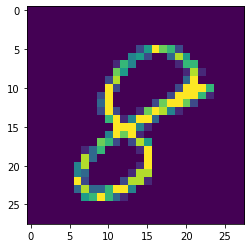

In [12]:
g = plt.imshow(X_train[0][:,:,0])

# Set the Model

In [16]:
model = Sequential()

model.add(Conv2D(filters= 32 , kernel_size = (5,5), padding= 'Same', activation='relu', input_shape = (28,28,1)))
model.add (Conv2D(filters = 32, kernel_size=(5,5), padding= 'Same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters =64, kernel_size =(3,3), padding = 'Same',activation='relu'))
model.add(Conv2D(filters = 64, kernel_size =(3,3),padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [19]:
optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay= 0.0)

In [20]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics = ['accuracy'])

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [22]:
epoch=30
batch_size=86

# Data Augmentation

In [23]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [24]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epoch, validation_data = (X_test,Y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 356s - loss: 0.4243 - accuracy: 0.8636 - val_loss: 0.0556 - val_accuracy: 0.9817
Epoch 2/30


C:\Users\Rupankar\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 421s - loss: 0.1242 - accuracy: 0.9626 - val_loss: 0.0558 - val_accuracy: 0.9826
Epoch 3/30
 - 404s - loss: 0.0937 - accuracy: 0.9726 - val_loss: 0.0411 - val_accuracy: 0.9850
Epoch 4/30
 - 391s - loss: 0.0793 - accuracy: 0.9760 - val_loss: 0.0295 - val_accuracy: 0.9912
Epoch 5/30
 - 404s - loss: 0.0682 - accuracy: 0.9805 - val_loss: 0.0272 - val_accuracy: 0.9910
Epoch 6/30
 - 392s - loss: 0.0632 - accuracy: 0.9817 - val_loss: 0.0310 - val_accuracy: 0.9912
Epoch 7/30
 - 406s - loss: 0.0621 - accuracy: 0.9824 - val_loss: 0.0234 - val_accuracy: 0.9926
Epoch 8/30
 - 406s - loss: 0.0608 - accuracy: 0.9826 - val_loss: 0.0435 - val_accuracy: 0.9879
Epoch 9/30
 - 401s - loss: 0.0602 - accuracy: 0.9829 - val_loss: 0.0214 - val_accuracy: 0.9936
Epoch 10/30
 - 398s - loss: 0.0570 - accuracy: 0.9827 - val_loss: 0.0238 - val_accuracy: 0.9940
Epoch 11/30
 - 421s - loss: 0.0541 - accuracy: 0.9845 - val_loss: 0.0241 - val_accuracy: 0.9936
Epoch 12/30
 - 425s - loss: 0.0557 - accuracy: 0.9848 - val

# Confusion Matrix

In [25]:
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Result Prediction

In [26]:
results = model.predict(test_data)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [27]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("my_submission.csv",index=False)